In [1]:
import os
import pathlib
from pathlib import Path
import re

import pandas as pd
import numpy as np

In [2]:
workdir='CNN_multitask_grid'
os.chdir('/users/qdb16186')
path=os.getcwd()
abs_dir=path+"/"+workdir

In [4]:
p = Path('./CNN_multitask_grid/CV/')
# for pth in p.iterdir('**/*.csv'):
somelist=list(p.glob('**/Granulated_multi_task_CNN/dH_dS_dG_Tm/*.csv'))
    # print(pth)
    # if pth.name.startswith(''):
        # print(pth)
len(somelist)/50

somelist[:10]
# pd.DataFrame(somelist[0].absolute())
# somelist[0].resolve()
# somelist[0].absolute().parts
# somelist[0].absolute().name
# somelist[0].resolve().absolute().as_posix()
# pd.DataFrame(somelist[0].resolve().absolute().as_posix())
# pd.DataFrame('~/users/qdb16186/SK-learn/CV/34/KNN/Granulated/dG/Split_34_type_train_pipe_cond_Scalling.csv')

[]

In [5]:
somelist[2].resolve().absolute().as_posix()

'/users/qdb16186/CNN_multitask_grid/CV/1/Granulated_multi_task_CNN/Granulated/dH_dS_dG_Tm/true_pred_grid_trial_0028.csv'

In [9]:
df=pd.read_csv(somelist[2].resolve().absolute().as_posix())
df.columns

Index(['Unnamed: 0', 'y_dH', 'y_dS', 'y_dG', 'y_Tm', 'y_dH_pred', 'y_dS_pred',
       'y_dG_pred', 'y_Tm_pred'],
      dtype='object')

In [14]:


df['dH_err'] = df[df.columns[1]] - df[df.columns[5]]
df['dS_err'] = df[df.columns[2]] - df[df.columns[6]]
df['dG_err'] = df[df.columns[3]] - df[df.columns[7]]
df['Tm_err'] = df[df.columns[4]] - df[df.columns[8]]

In [40]:
from sklearn import metrics
from sklearn.metrics import make_scorer
from sklearn.metrics import r2_score, mean_squared_error, explained_variance_score
from sklearn.metrics import mean_absolute_error


In [45]:
def stats(x,y):
    
    y_test = x
    y_pred_test = y
    y_test_np = y_test.to_numpy()
    y_pred_test_np = y_pred_test.to_numpy()
    r2_test = r2_score(y_test_np, y_pred_test_np)
    rmsd_test = (mean_squared_error(y_test_np, y_pred_test_np))**0.5
    bias_test = np.mean(y_pred_test_np - y_test_np)
    sdep_test = (np.mean((y_pred_test_np - y_test_np - bias_test)**2))**0.5
    r2 = '{:.3f}'.format(r2_test)
    rmsd = '{:.3f}'.format(rmsd_test)
    bias = '{:.3f}'.format(bias_test)
    sdep = '{:.3f}'.format(sdep_test)
    
    
    mse=mean_squared_error(y_test_np, y_pred_test_np)
    mse='{:.3f}'.format(mse)
    mae=mean_absolute_error(y_test_np, y_pred_test_np)
    mae='{:.3f}'.format(mae)
    try:
        a, b = np.polyfit(x, y, 1)
        plot_a = '{:.3f}'.format(a)
        plot_b = '{:.3f}'.format(b)
    except np.linalg.LinAlgError:
        pass
    
    return r2, rmsd, bias, sdep, plot_a, plot_b, mse, mae

In [74]:
r2, rmsd, bias, sdep, plot_a, plot_b, mse, mae = stats(df['dH_err'],df['dS_err'])
r2_test = explained_variance_score(df['dG_err'], df['dS_err'])
r2_test
plot_b

'-10.477'

In [61]:
corr_matrix = np.corrcoef([df['dH_err'],df['dS_err'],df['dG_err'],df['Tm_err']]).round(decimals=2)
corr_matrix

array([[ 1.  ,  0.99,  0.92, -0.89],
       [ 0.99,  1.  ,  0.88, -0.85],
       [ 0.92,  0.88,  1.  , -0.95],
       [-0.89, -0.85, -0.95,  1.  ]])

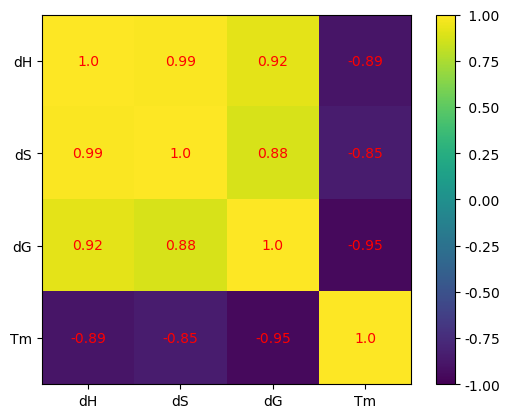

In [72]:
fig, ax = plt.subplots()
im = ax.imshow(corr_matrix)
im.set_clim(-1, 1)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1, 2,3), ticklabels=('dH', 'dS', 'dG','Tm'))
ax.yaxis.set(ticks=(0, 1, 2,3), ticklabels=('dH', 'dS', 'dG','Tm'))
# ax.set_ylim(2.5, -0.5)
for i in range(4):#[df['dH_err'],df['dS_err'],df['dG_err'],df['Tm_err']]:
    for j in range(4):#[df['dH_err'],df['dS_err'],df['dG_err'],df['Tm_err']]:
        ax.text(j, i, corr_matrix[i, j], ha='center', va='center',
                color='r')
cbar = ax.figure.colorbar(im, ax=ax, format='% .2f')
plt.show()


In [16]:
import matplotlib.pyplot as plt

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


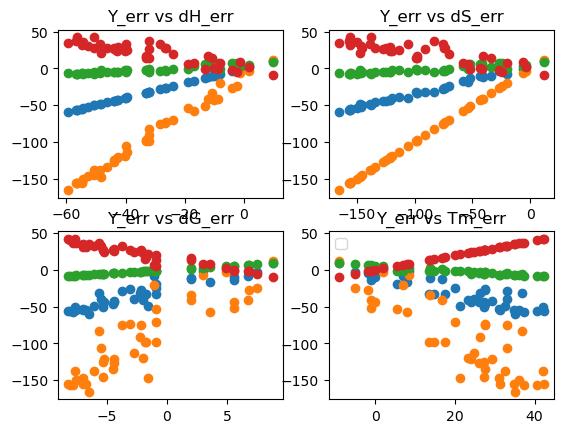

In [39]:
figure, axis = plt.subplots(2, 2,
                           squeeze=True, 
                            width_ratios=None, 
                            height_ratios=None, 
                            subplot_kw=None, 
                            gridspec_kw=None) 

# For Sine Function 
axis[0, 0].scatter(df['dH_err'],df['dH_err'])
axis[0, 0].scatter(df['dH_err'],df['dS_err'])
axis[0, 0].scatter(df['dH_err'],df['dG_err'])
axis[0, 0].scatter(df['dH_err'],df['Tm_err'])
axis[0, 0].set_title("Y_err vs dH_err") 

# For Cosine Function 
axis[0, 1].scatter(df['dS_err'],df['dH_err'])
axis[0, 1].scatter(df['dS_err'],df['dS_err'])
axis[0, 1].scatter(df['dS_err'],df['dG_err'])
axis[0, 1].scatter(df['dS_err'],df['Tm_err'])
axis[0, 1].set_title("Y_err vs dS_err") 
  
# For Tangent Function 
axis[1, 0].scatter(df['dG_err'],df['dH_err']) 
axis[1, 0].scatter(df['dG_err'],df['dS_err']) 
axis[1, 0].scatter(df['dG_err'],df['dG_err']) 
axis[1, 0].scatter(df['dG_err'],df['Tm_err']) 
axis[1, 0].set_title("Y_err vs dG_err") 
  
# For Tanh Function 
axis[1, 1].scatter(df['Tm_err'],df['dH_err'])
axis[1, 1].scatter(df['Tm_err'],df['dS_err'])
axis[1, 1].scatter(df['Tm_err'],df['dG_err'])
axis[1, 1].scatter(df['Tm_err'],df['Tm_err'])
axis[1, 1].set_title("Y_err vs Tm_err") 

plt.legend() 
# plt.figure(figsize=(10,12))
# Combine all the operations and display 
plt.show() 


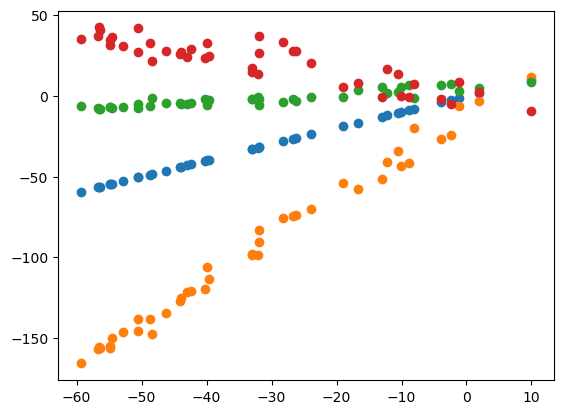

In [23]:
plt.scatter(df['dH_err'],df['dH_err'])
plt.scatter(df['dH_err'],df['dS_err'])
plt.scatter(df['dH_err'],df['dG_err'])
plt.scatter(df['dH_err'],df['Tm_err'])

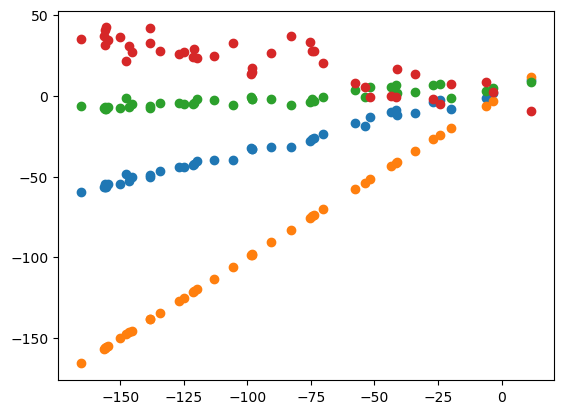

In [26]:
plt.scatter(df['dS_err'],df['dH_err'])
plt.scatter(df['dS_err'],df['dS_err'])
plt.scatter(df['dS_err'],df['dG_err'])
plt.scatter(df['dS_err'],df['Tm_err'])

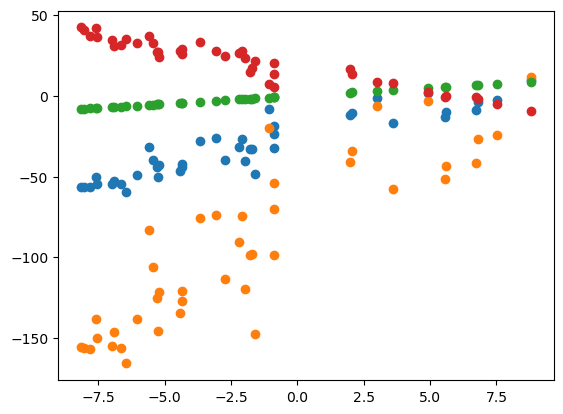

In [25]:
plt.scatter(df['dG_err'],df['dH_err'])
plt.scatter(df['dG_err'],df['dS_err'])
plt.scatter(df['dG_err'],df['dG_err'])
plt.scatter(df['dG_err'],df['Tm_err'])

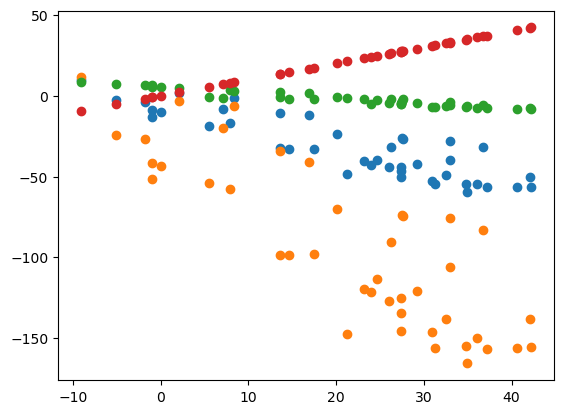

In [24]:
plt.scatter(df['Tm_err'],df['dH_err'])
plt.scatter(df['Tm_err'],df['dS_err'])
plt.scatter(df['Tm_err'],df['dG_err'])
plt.scatter(df['Tm_err'],df['Tm_err'])